In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from scipy.stats import ks_2samp

In [24]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [25]:
train_df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [26]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [27]:
train_df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
print("Data types")
print(train_df.dtypes)

target = "diagnosed_diabetes"
id_col = "id"

numeric_features = [
    "age",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "sleep_hours_per_day",
    "screen_time_hours_per_day",
    "bmi",
    "waist_to_hip_ratio",
    "systolic_bp",
    "diastolic_bp",
    "heart_rate",
    "cholesterol_total",
    "hdl_cholesterol",
    "ldl_cholesterol",
    "triglycerides",
]

categorical_features = [
    "gender",
    "ethnicity",
    "education_level",
    "income_level",
    "smoking_status",
    "employment_status",
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history",
]

Data types
id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
smoking_status                         object
employment_status      

In [29]:
train_df.isnull().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [30]:
target_col = "diagnosed_diabetes" 

target_counts = train_df[target_col].value_counts()
target_pct = train_df[target_col].value_counts(normalize=True) * 100

print(target_counts)
print(target_pct)

imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")

diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64
diagnosed_diabetes
1.0    62.329571
0.0    37.670429
Name: proportion, dtype: float64

Imbalance Ratio: 1.65


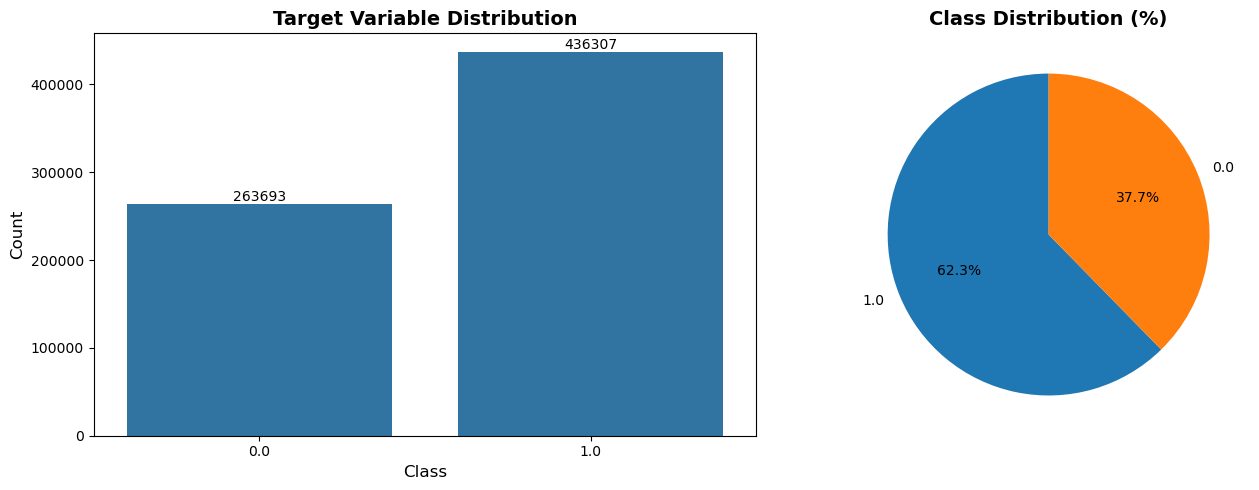

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=train_df, x=target_col, ax=axes[0],)
axes[0].set_title("Target Variable Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Class", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

for container in axes[0].containers:
    axes[0].bar_label(container)

axes[1].pie(
    target_counts,
    labels=target_counts.index,
    autopct="%1.1f%%",
    startangle=90,
)
axes[1].set_title("Class Distribution (%)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig("../figures/target_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [32]:
train_df.describe()


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


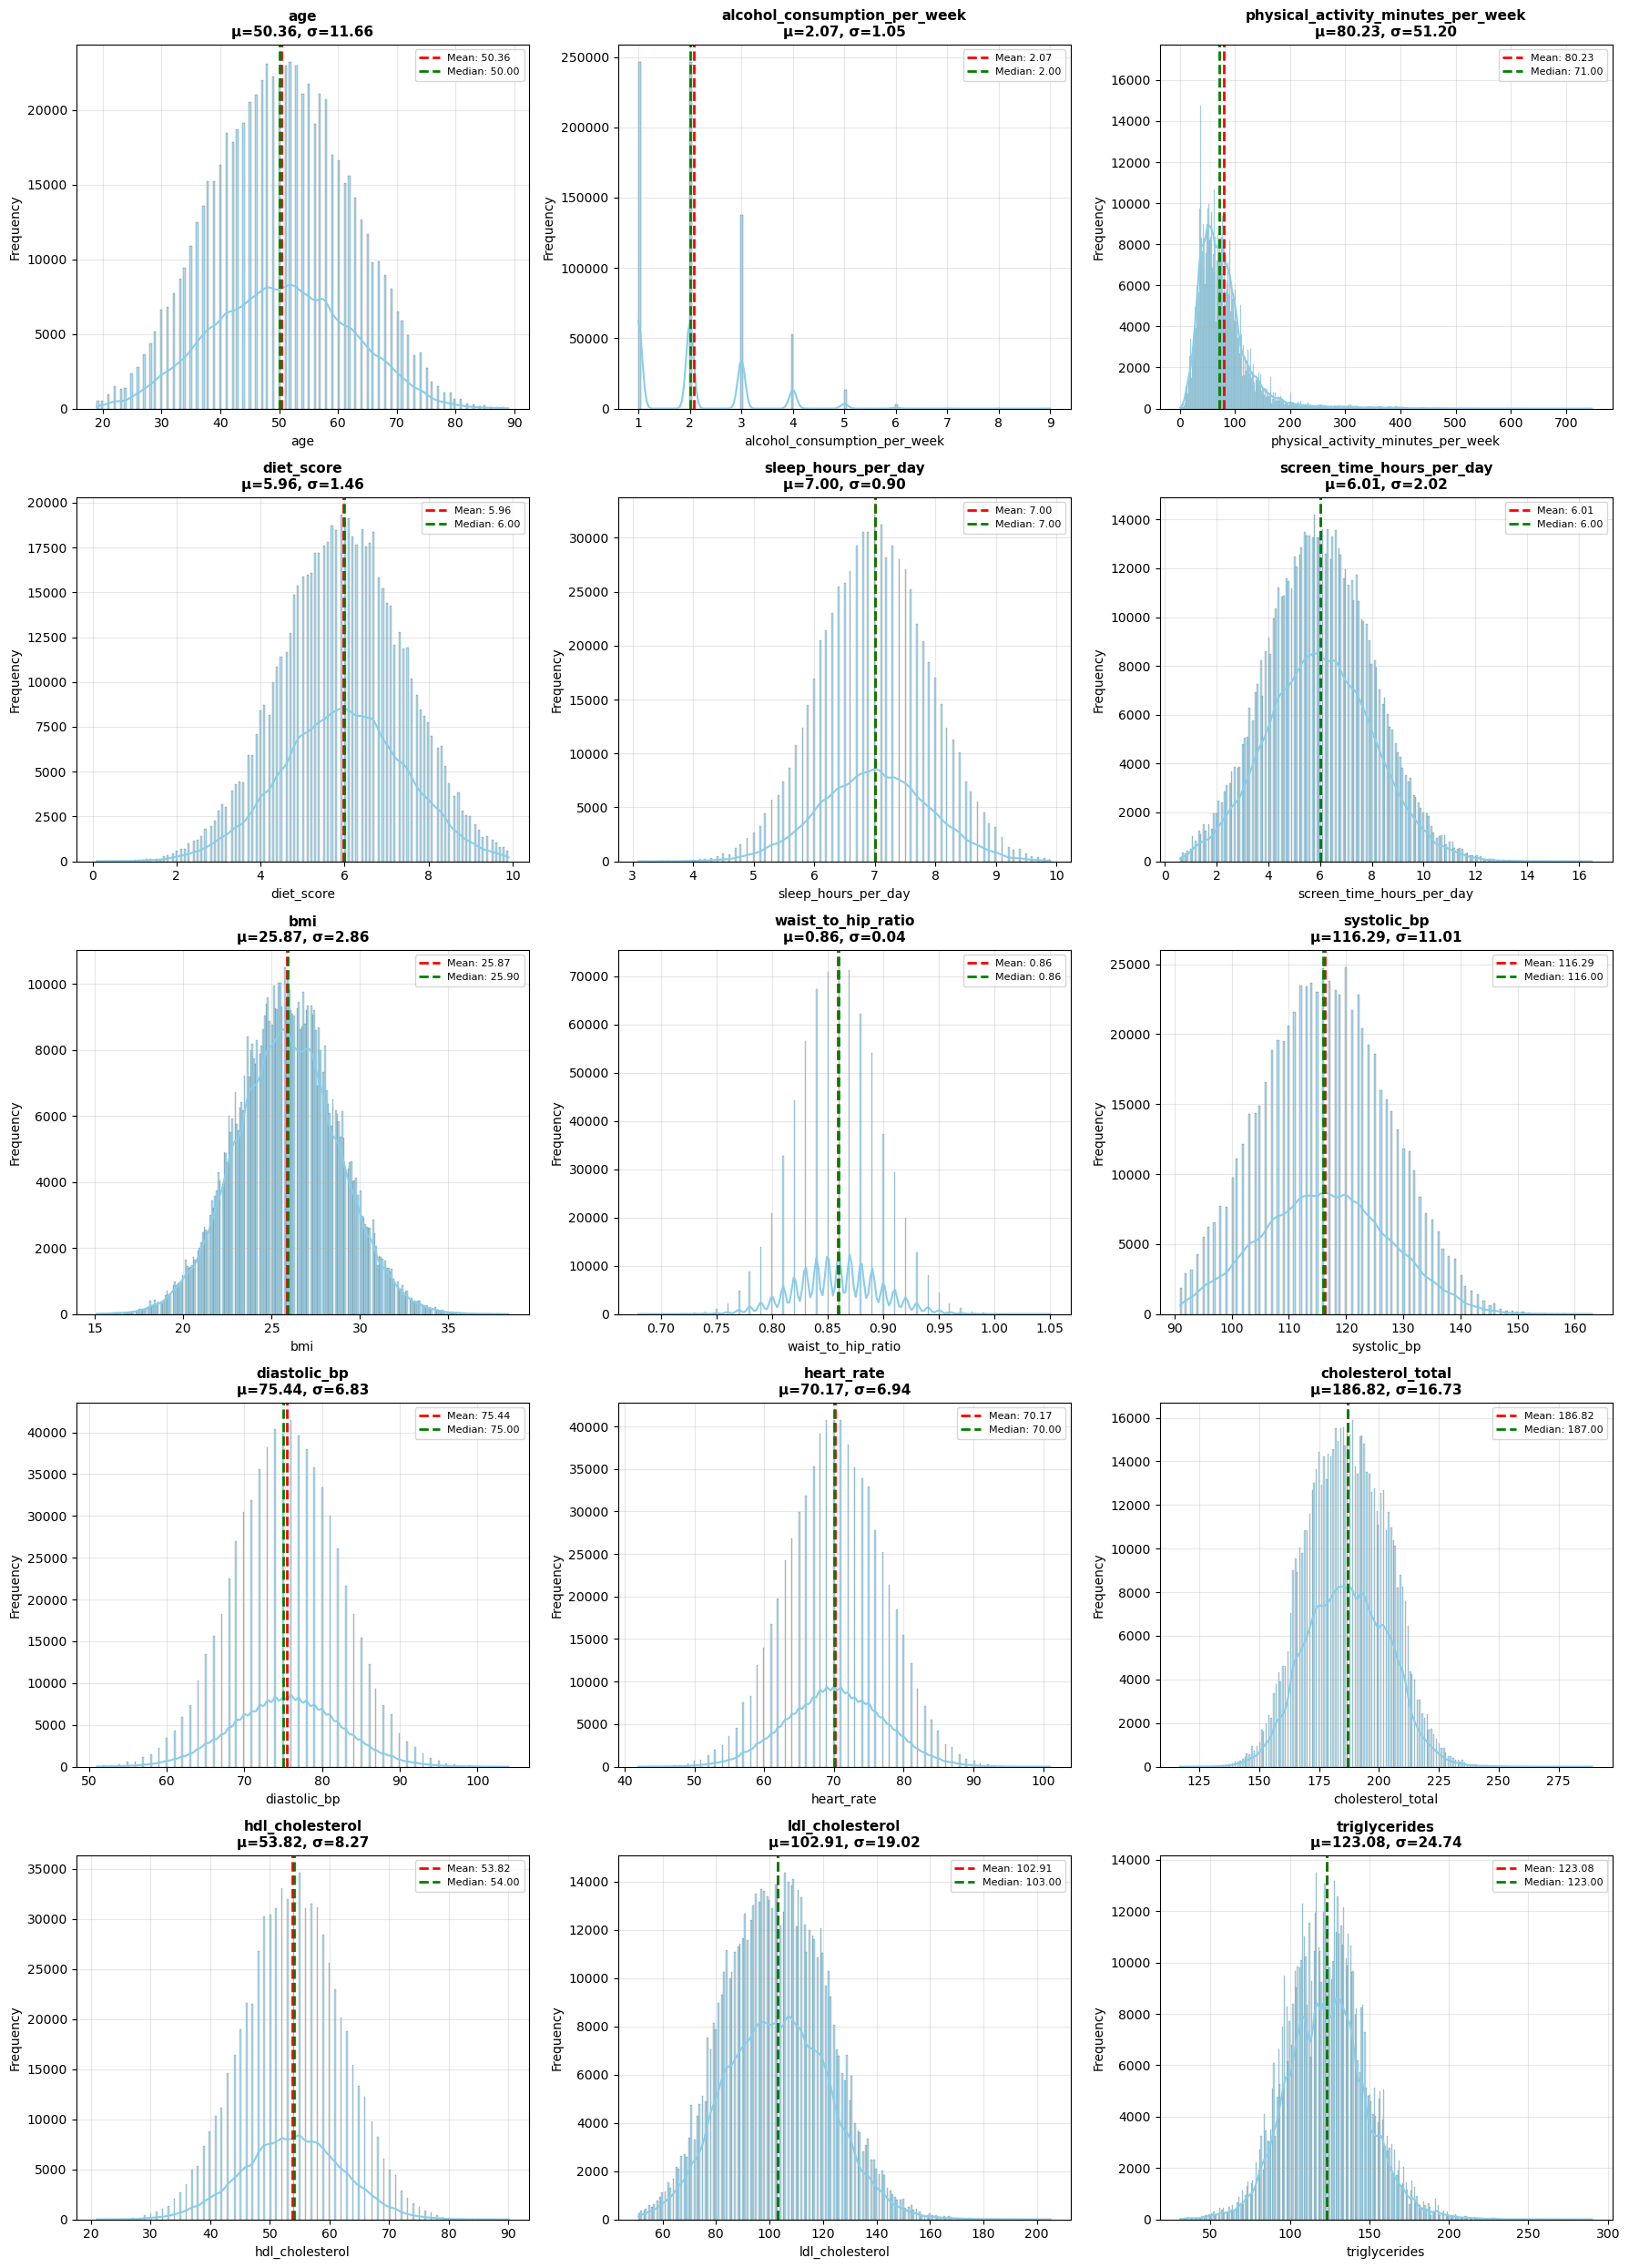

In [33]:
n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(numeric_features):
    ax = axes[idx]

    sns.histplot(
        data=train_df,
        x=col,
        kde=True,
        ax=ax,
        color="skyblue",
        edgecolor="black",
        alpha=0.7,
    )

    mean_val = train_df[col].mean()
    median_val = train_df[col].median()
    std_val = train_df[col].std()

    ax.axvline(
        mean_val,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {mean_val:.2f}",
    )
    ax.axvline(
        median_val,
        color="green",
        linestyle="--",
        linewidth=2,
        label=f"Median: {median_val:.2f}",
    )

    ax.set_title(
        f"{col}\nμ={mean_val:.2f}, σ={std_val:.2f}", fontsize=11, fontweight="bold"
    )
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.savefig("../figures/numerical_distributions.png", dpi=300, bbox_inches="tight")
plt.show()

gender
Female    363237
Male      333085
Other       3678
Name: count, dtype: int64
Unique values: 3
ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64
Unique values: 5
education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64
Unique values: 4
income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64
Unique values: 5
smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64
Unique values: 3
employment_status
Employed      516170
Retired       115735
Unemployed     49787
Student        18308
Name: count, dtype: int64
Unique values: 4
family_history_diabetes
0    595419
1    104581
Name: count, dtype: int64
Unique values: 2
hypertension_history
0    572607
1    127393
Name: count, dtype: int64
Unique val

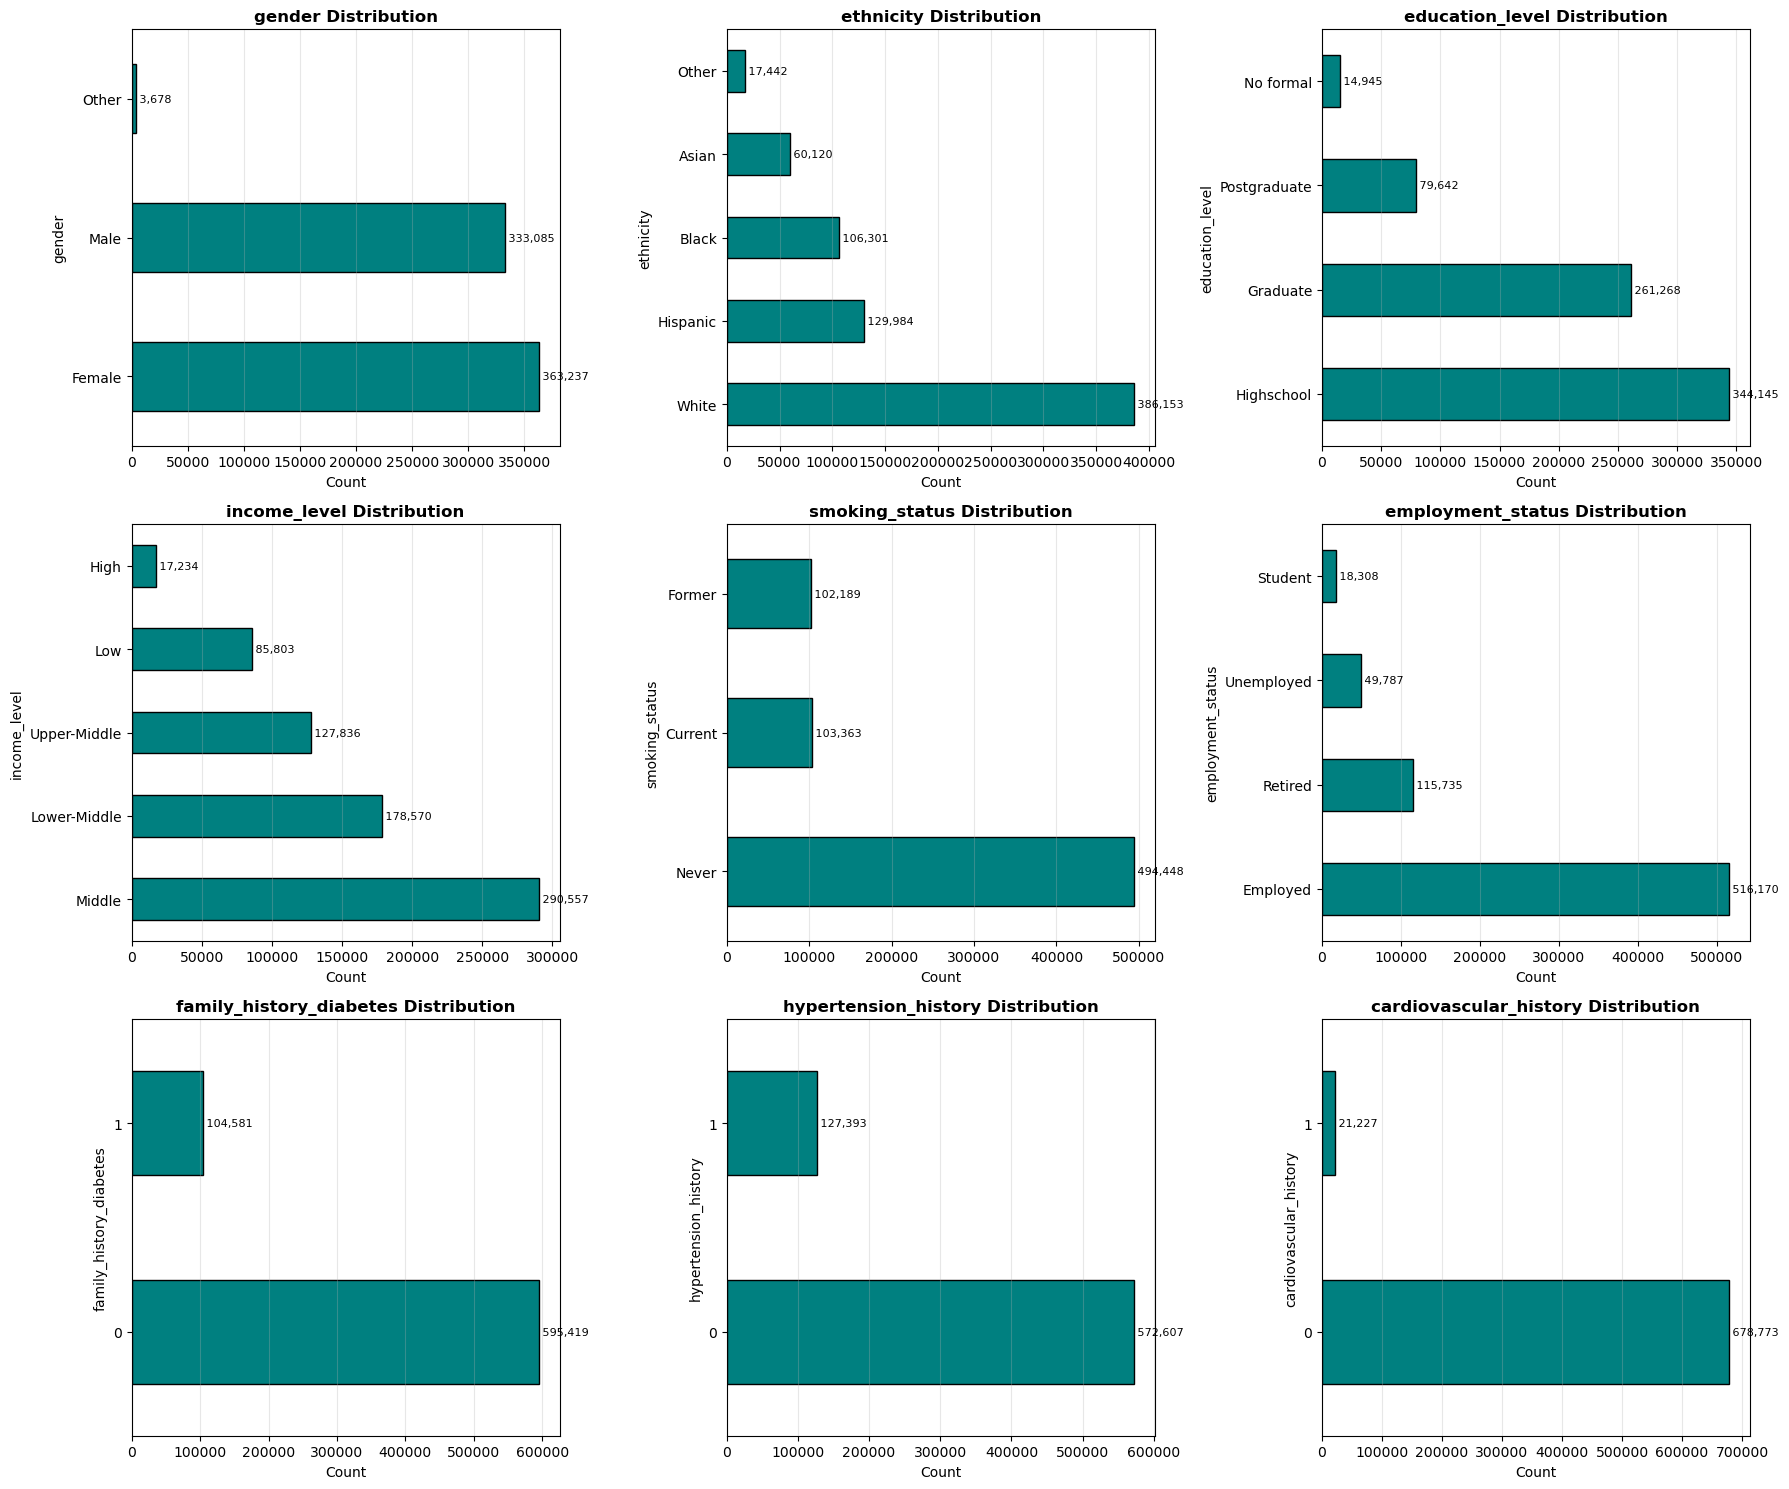

In [34]:
for col in categorical_features:
    print(train_df[col].value_counts())
    print(f"Unique values: {train_df[col].nunique()}")

n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    ax = axes[idx]

    value_counts = train_df[col].value_counts()
    value_counts.plot(kind="barh", ax=ax, color="teal", edgecolor="black")

    ax.set_title(f"{col} Distribution", fontsize=12, fontweight="bold")
    ax.set_xlabel("Count", fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    ax.grid(True, alpha=0.3, axis="x")

    for i, v in enumerate(value_counts.values):
        ax.text(v, i, f" {v:,}", va="center", fontsize=8)

for idx in range(len(categorical_features), len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.savefig("../figures/categorical_distributions.png", dpi=300, bbox_inches="tight")
plt.show()

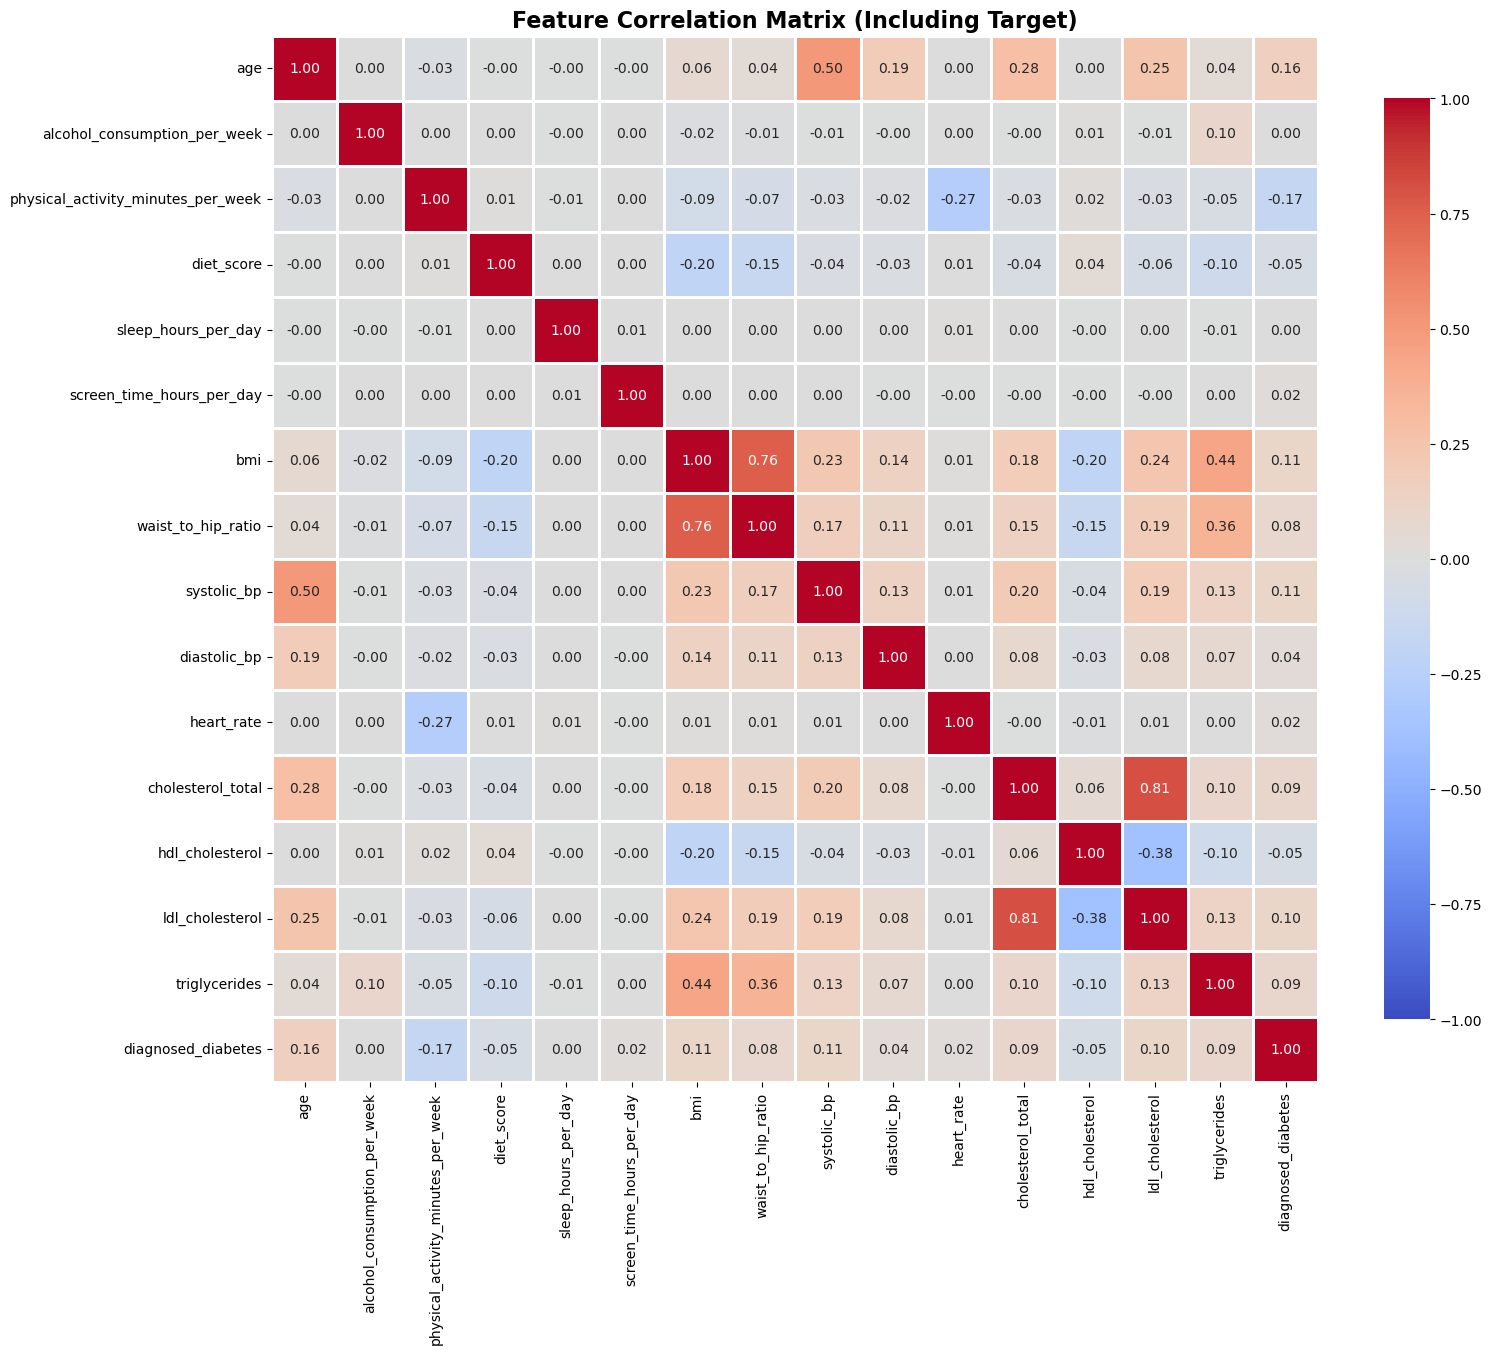

age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
diastolic_bp                          0.036271
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
sleep_hours_per_day                   0.003509
alcohol_consumption_per_week          0.002991
diet_score                           -0.050119
hdl_cholesterol                      -0.053231
physical_activity_minutes_per_week   -0.169789
Name: diagnosed_diabetes, dtype: float64


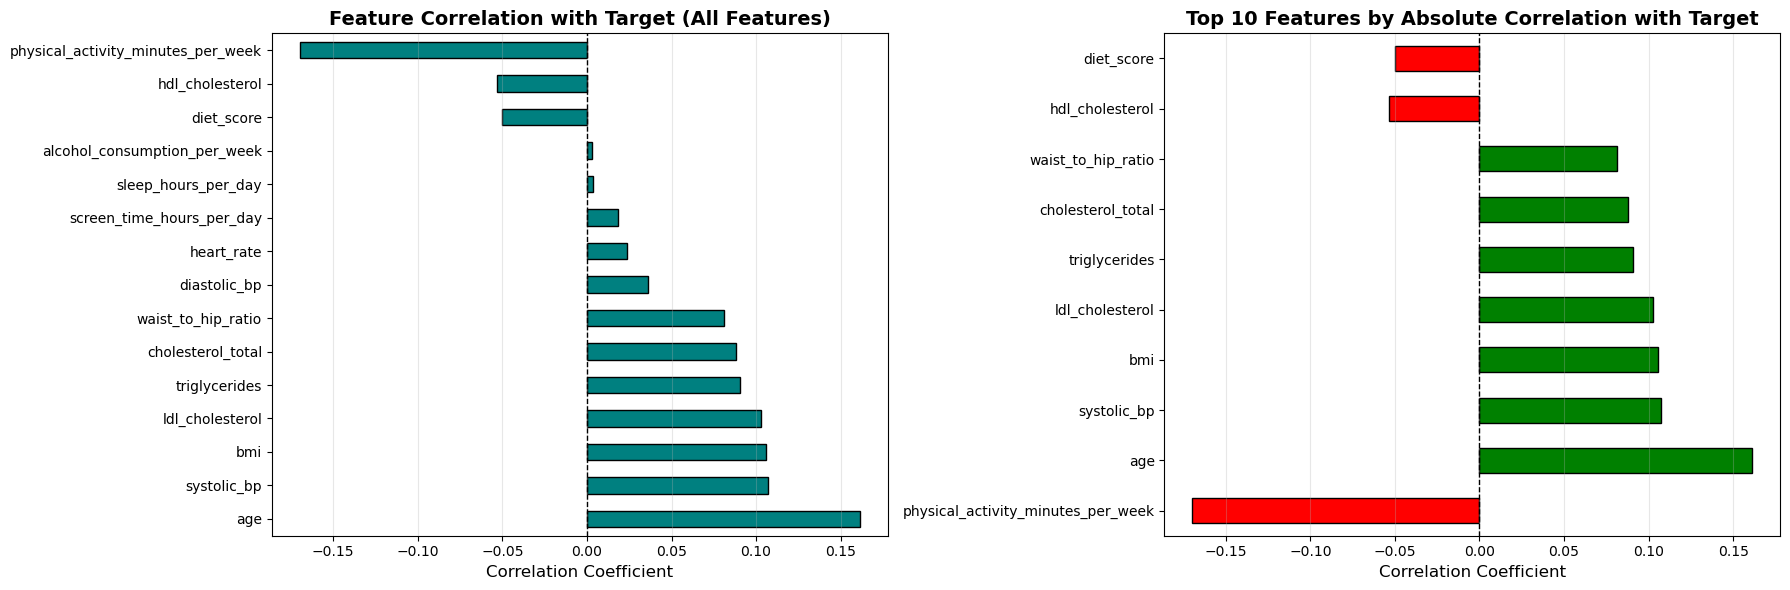

In [35]:
correlation_matrix = train_df[numeric_features + [target]].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
)
plt.title(
    "Feature Correlation Matrix (Including Target)", fontsize=16, fontweight="bold"
)
plt.tight_layout()
plt.savefig("../figures/correlation_heatmap_full.png", dpi=300, bbox_inches="tight")
plt.show()

target_corr = correlation_matrix[target].drop(target).sort_values(ascending=False)

print(target_corr)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

target_corr.plot(kind="barh", ax=axes[0], color="teal", edgecolor="black")
axes[0].set_title(
    "Feature Correlation with Target (All Features)", fontsize=14, fontweight="bold"
)
axes[0].set_xlabel("Correlation Coefficient", fontsize=12)
axes[0].axvline(0, color="black", linestyle="--", linewidth=1)
axes[0].grid(True, alpha=0.3, axis="x")

top_10_corr = target_corr.abs().nlargest(10)
top_10_actual = target_corr[top_10_corr.index]
colors = ["green" if x > 0 else "red" for x in top_10_actual]
top_10_actual.plot(kind="barh", ax=axes[1], color=colors, edgecolor="black")
axes[1].set_title(
    "Top 10 Features by Absolute Correlation with Target",
    fontsize=14,
    fontweight="bold",
)
axes[1].set_xlabel("Correlation Coefficient", fontsize=12)
axes[1].axvline(0, color="black", linestyle="--", linewidth=1)
axes[1].grid(True, alpha=0.3, axis="x")

plt.tight_layout()
plt.savefig("../figures/target_correlation.png", dpi=300, bbox_inches="tight")
plt.show()

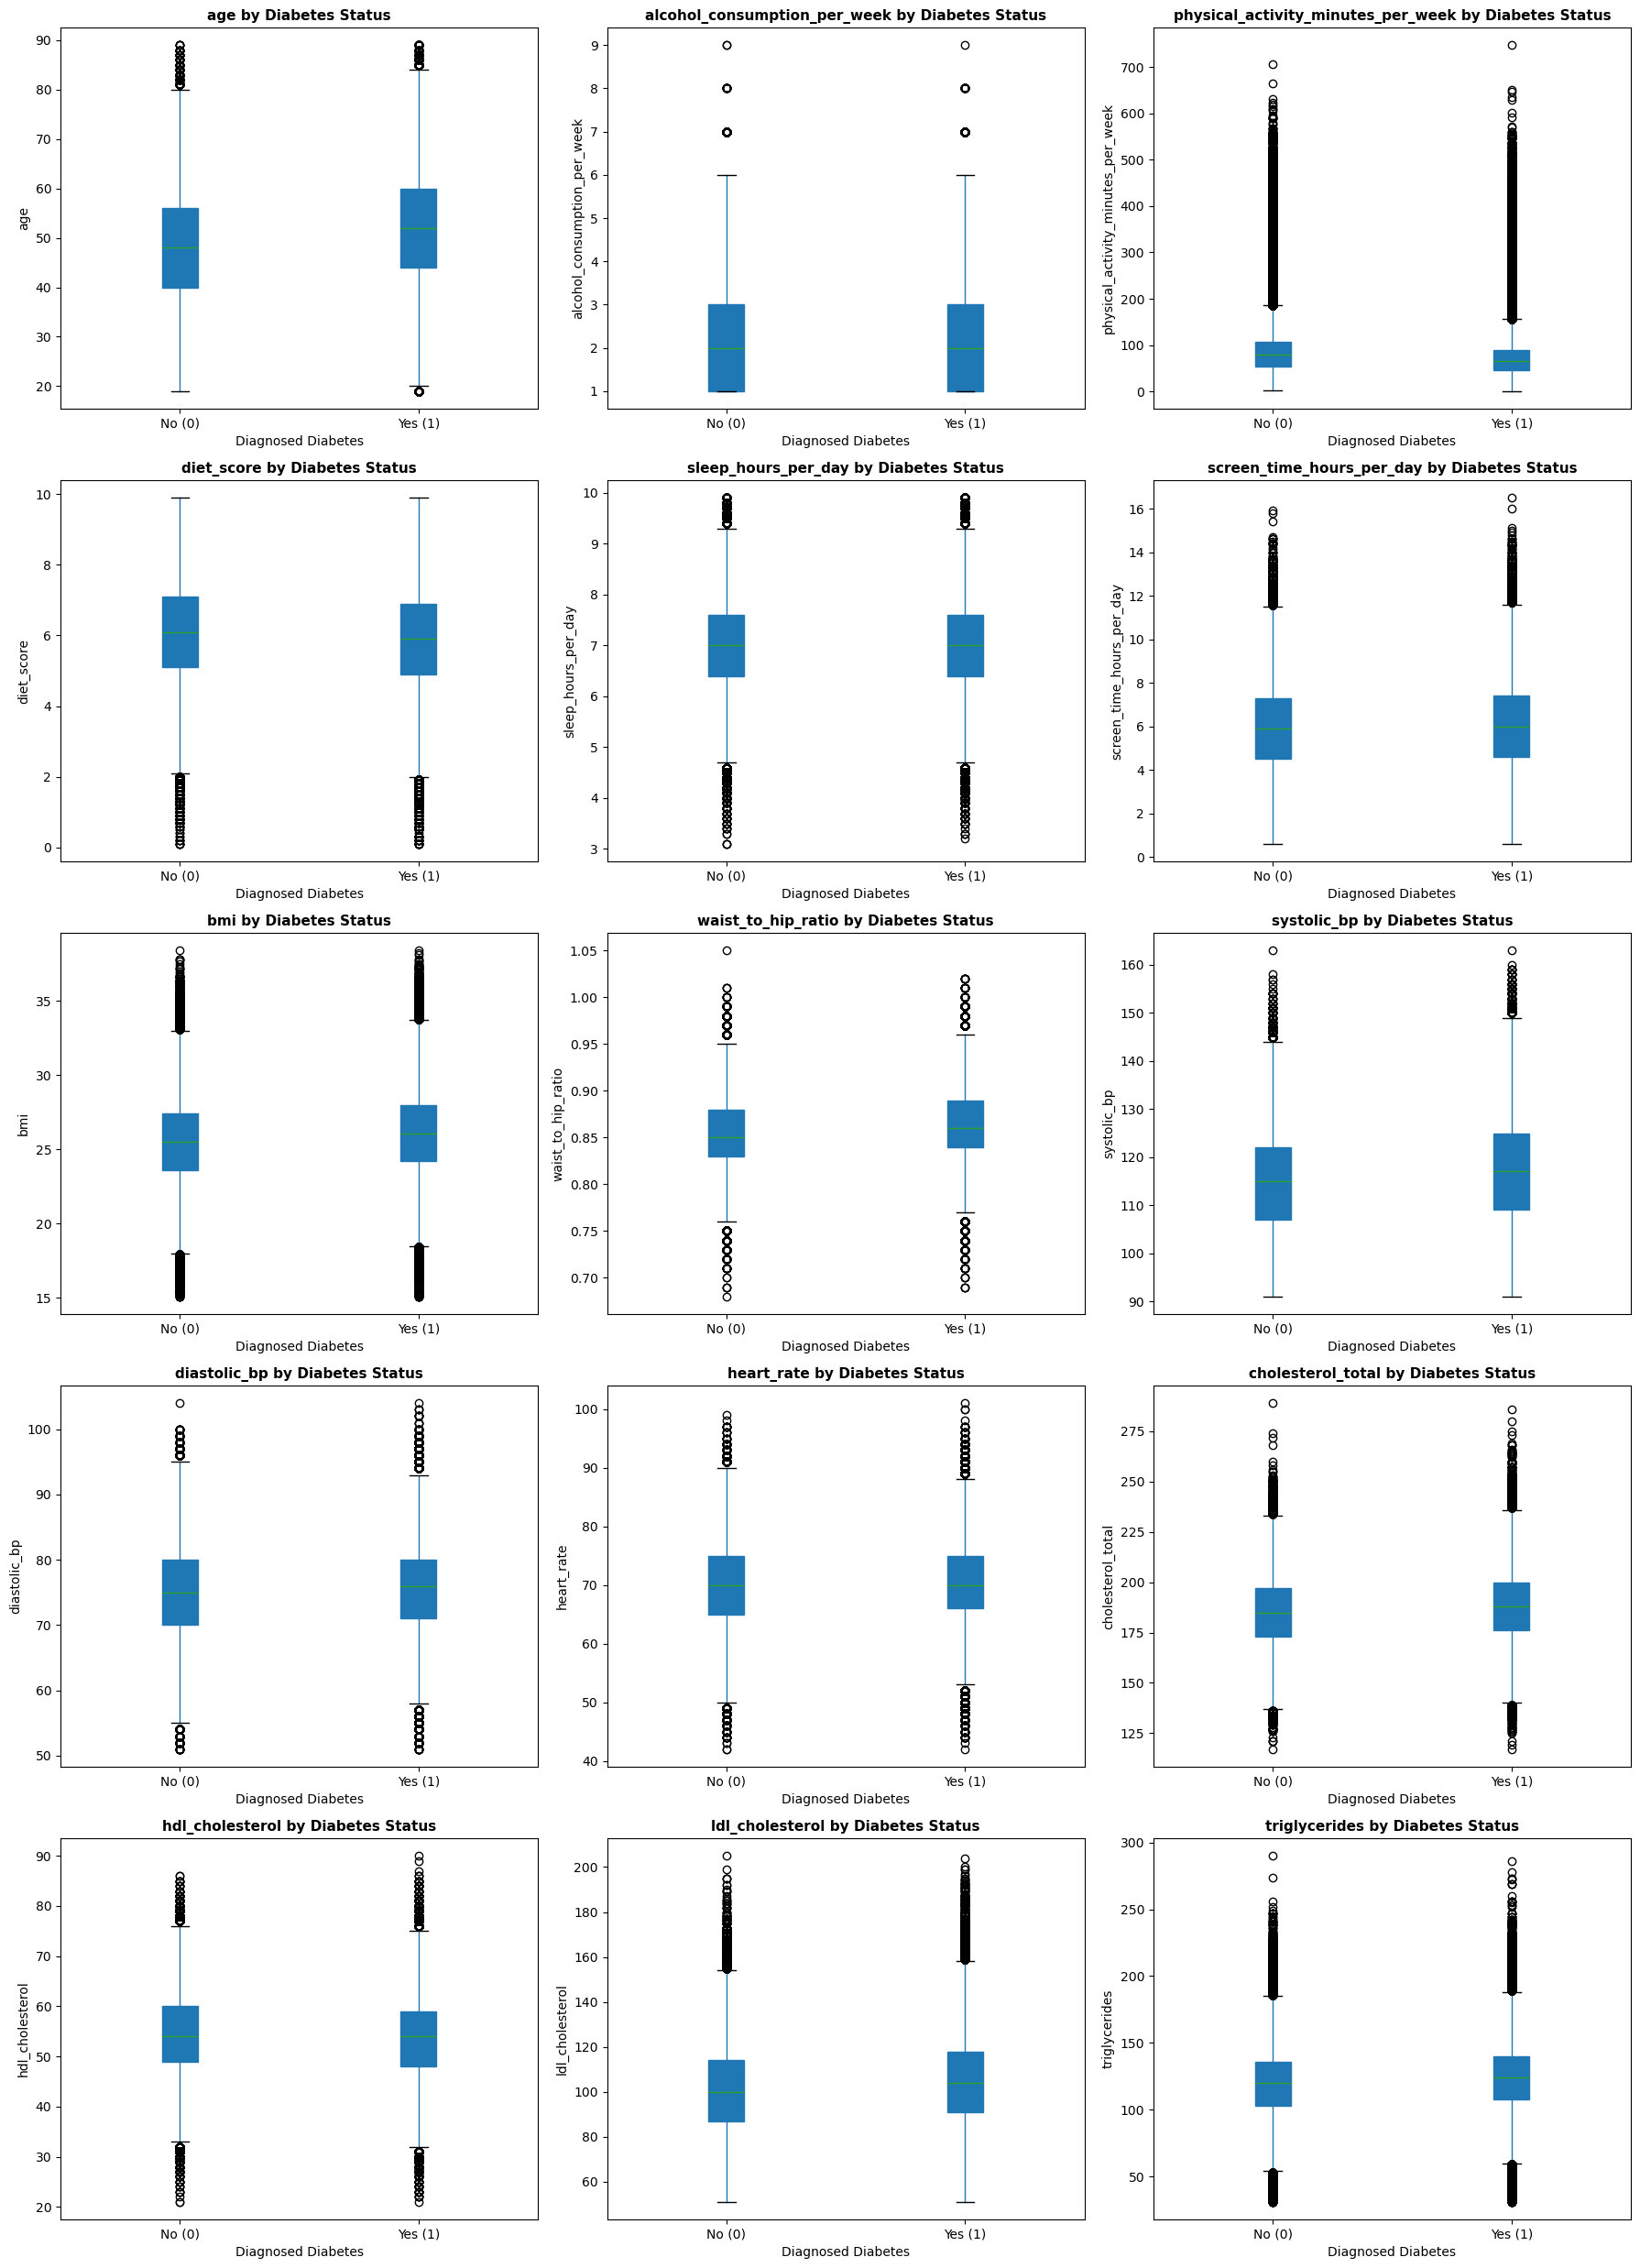

In [39]:
fig, axes = plt.subplots(
    nrows=(len(numeric_features) + 2) // 3,
    ncols=3,
    figsize=(18, 5 * ((len(numeric_features) + 2) // 3)),
)
axes = axes.ravel()

for idx, col in enumerate(numeric_features):
    ax = axes[idx]

    train_df.boxplot(column=col, by=target, ax=ax, patch_artist=True, grid=False)
    ax.set_title(f"{col} by Diabetes Status", fontsize=11, fontweight="bold")
    ax.set_xlabel("Diagnosed Diabetes", fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    plt.sca(ax)
    plt.xticks([1, 2], ["No (0)", "Yes (1)"])

for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis("off")

plt.suptitle("") 
plt.tight_layout()
plt.savefig("../figures/features_vs_target_boxplots.png", dpi=300, bbox_inches="tight")
plt.show()

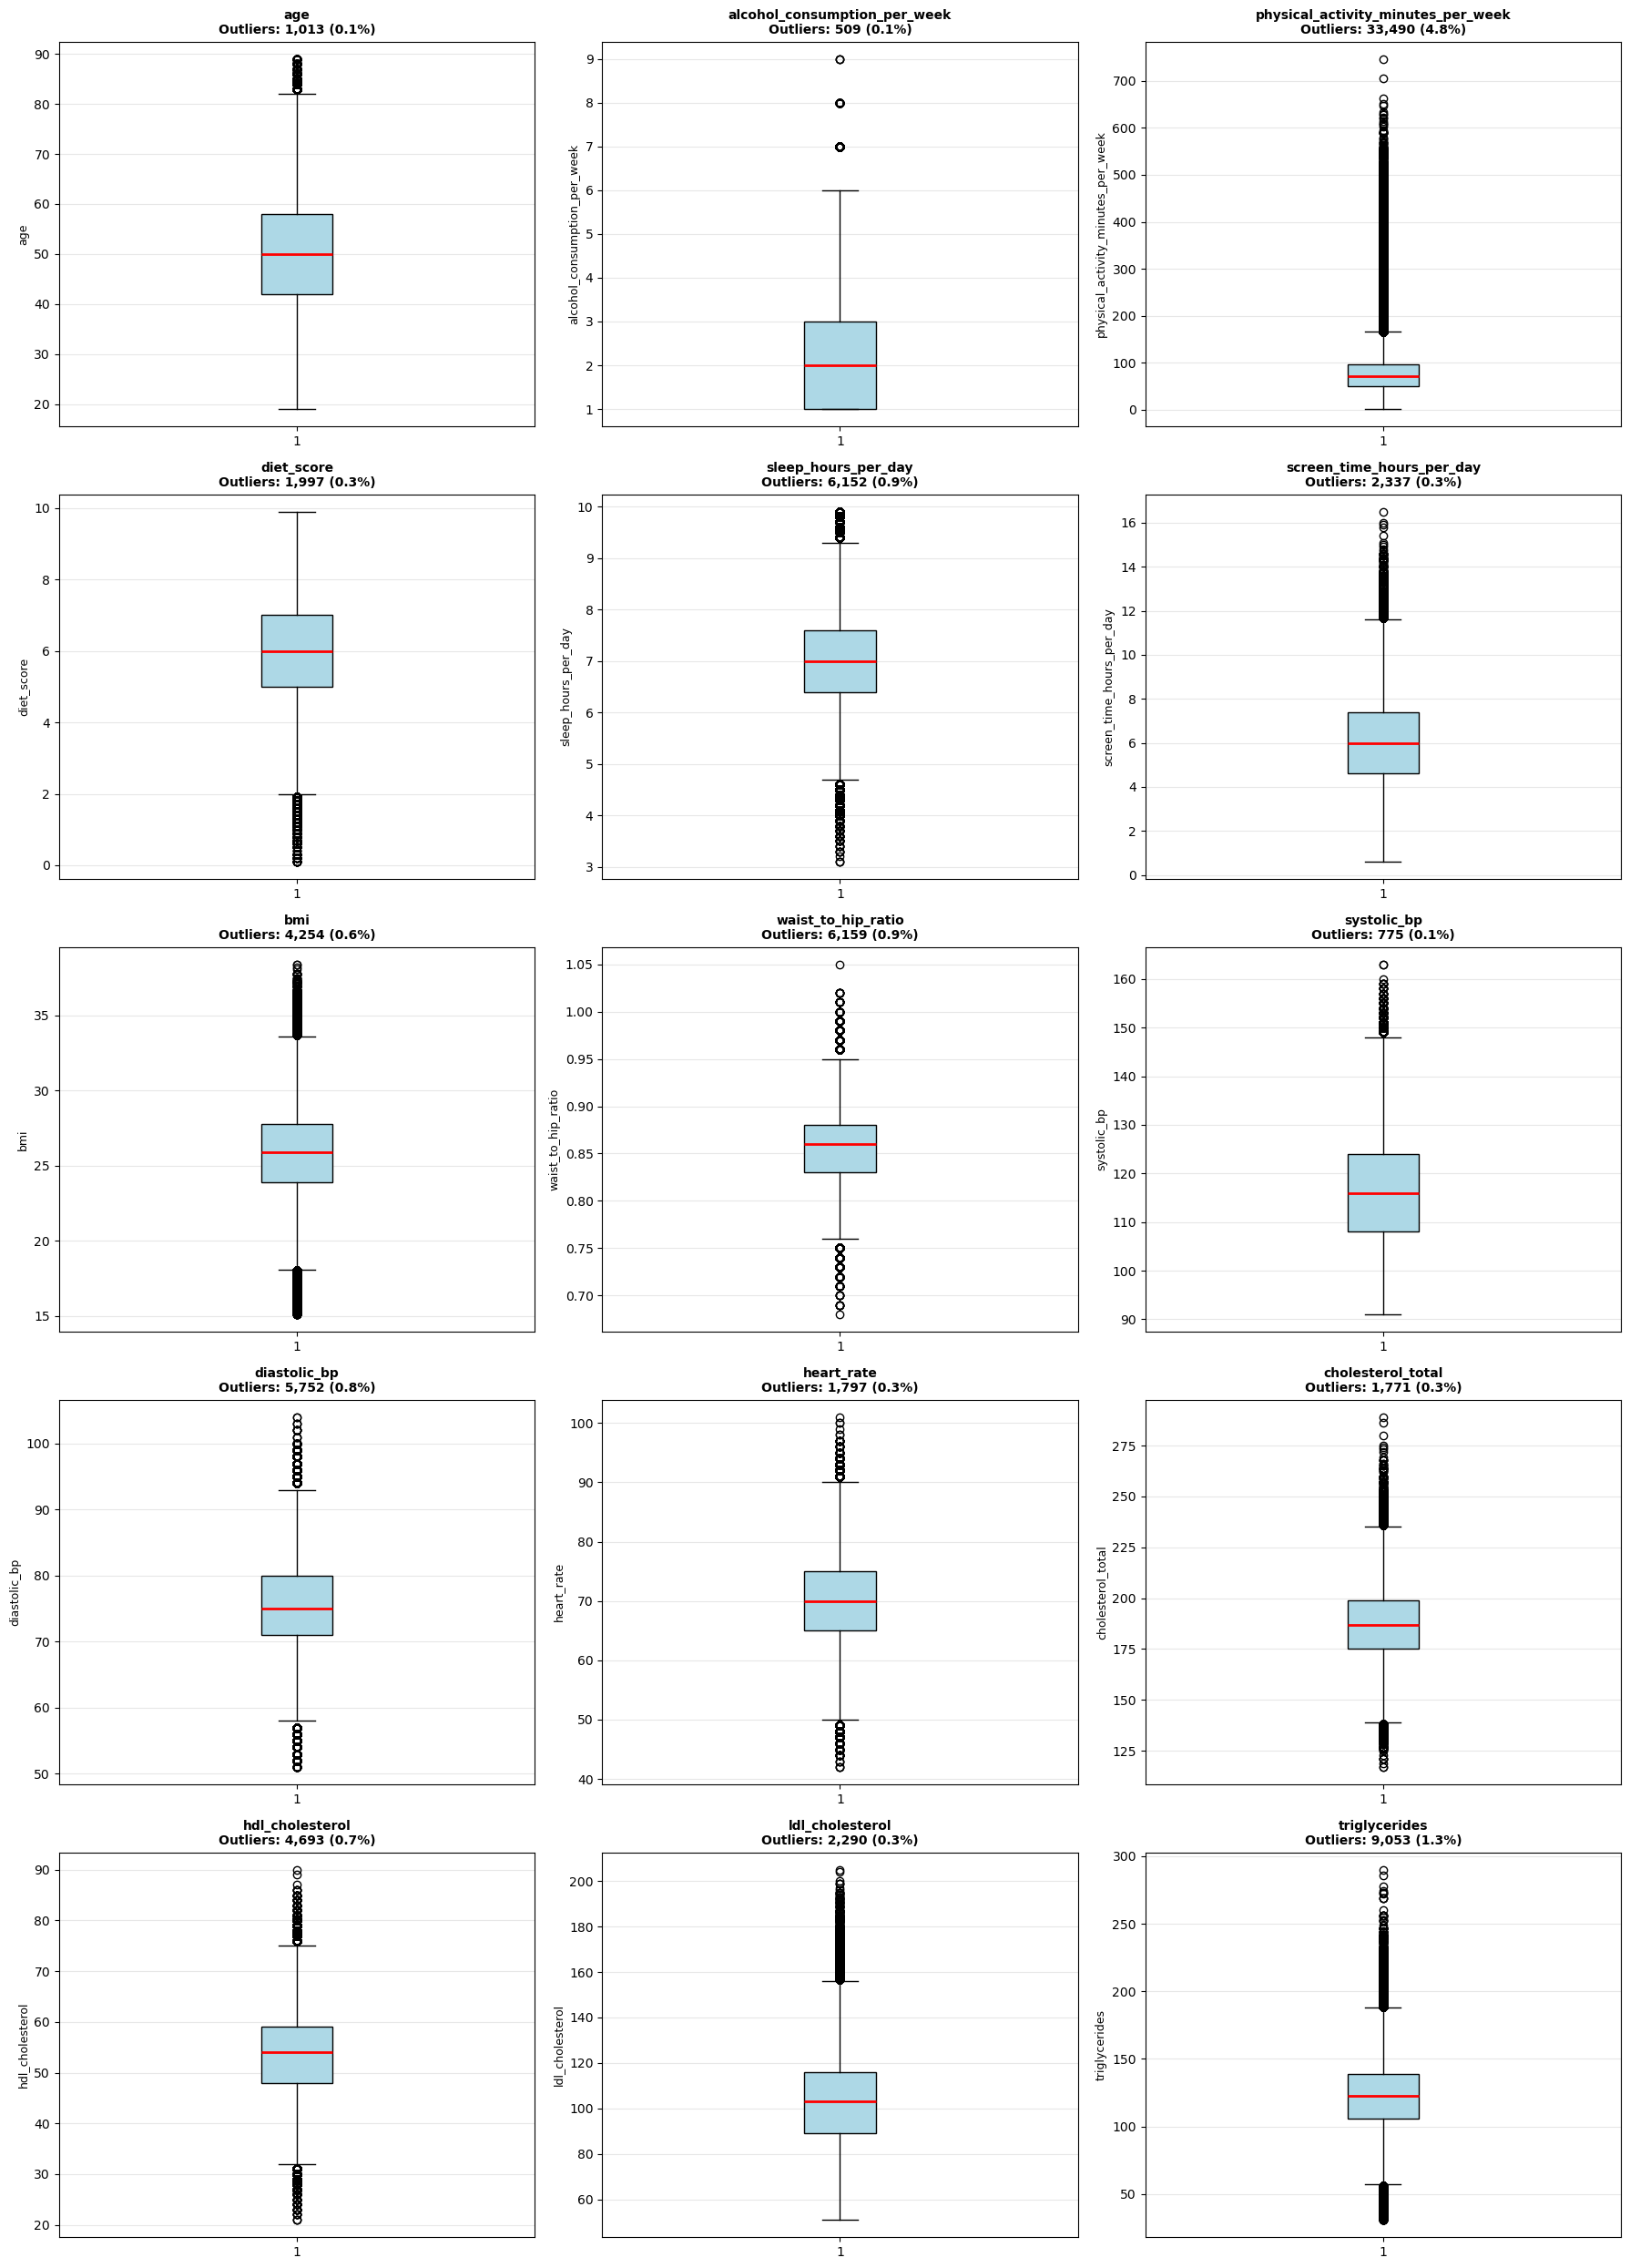

In [ ]:
def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outliers_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outliers_info[col] = {
            "count": len(outliers),
            "percentage": (len(outliers) / len(df)) * 100,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
        }

    return outliers_info


outliers_train = detect_outliers_iqr(train_df, numeric_features)

fig, axes = plt.subplots(
    nrows=(len(numeric_features) + 2) // 3,
    ncols=3,
    figsize=(18, 5 * ((len(numeric_features) + 2) // 3)),
)
axes = axes.ravel()

for idx, col in enumerate(numeric_features):
    ax = axes[idx]

    bp = ax.boxplot(
        train_df[col].dropna(),
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", edgecolor="black"),
        medianprops=dict(color="red", linewidth=2),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
    )

    ax.set_title(
        f'{col}\nOutliers: {outliers_train[col]["count"]:,} '
        f'({outliers_train[col]["percentage"]:.1f}%)',
        fontsize=10,
        fontweight="bold",
    )
    ax.set_ylabel(col, fontsize=9)
    ax.grid(True, alpha=0.3, axis="y")

for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.savefig("../figures/outliers_boxplots.png", dpi=300, bbox_inches="tight")
plt.show()